<a href="https://colab.research.google.com/github/Abhinav4518/Abhinav4518/blob/main/Task1w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df_true = pd.read_csv('True.csv')
    df_fake = pd.read_csv('Fake.csv')
except FileNotFoundError:
    print("Error: 'True.csv' or 'Fake.csv' not found. Please ensure both files are in the same directory.")
    exit()

In [3]:
df_true['label'] = 'REAL'
df_fake['label'] = 'FAKE'


In [4]:
df = pd.concat([df_true, df_fake], ignore_index=True)


In [5]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
print("Datasets loaded, processed, and combined successfully.")
print("Shape of the combined dataset:", df.shape)
print("\nFirst 5 rows of the shuffled dataset:")
print(df.head())
print("\nClass distribution in the dataset:")
print(df.label.value_counts())


Datasets loaded, processed, and combined successfully.
Shape of the combined dataset: (44898, 5)

First 5 rows of the shuffled dataset:
                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date label  
0     July 21, 2017  FAKE  
1       May 7, 2016  FAKE  
2  December 3, 2016  F

In [7]:
X = df['text']
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets.")



Data split into training and testing sets.


In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [12]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [13]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [15]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {round(score*100, 2)}%')



Model Accuracy: 99.42%


In [16]:
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

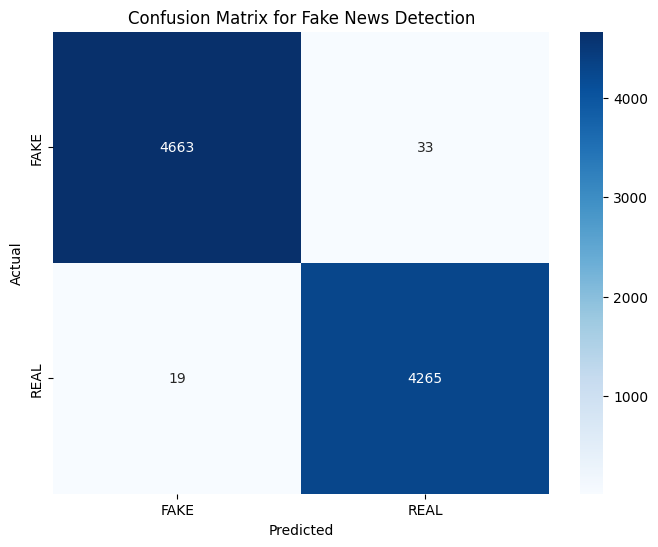

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fake News Detection')
plt.show()


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      4696
        REAL       0.99      1.00      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

